# SHREYAS S N
# B200773CS
# Decision Tree

# _

# Q1 : Splitting the data into training and test sets with an 80:20 ratio.

In [14]:
import pandas as pd
global decs_tree
decs_tree = ''
df = pd.read_csv('weather_conditions.csv')
     
#X = df.iloc[:, :-1]
#y = df.iloc[:, -1]

train_size = int(0.8 * len(df))   #Splitting the data into training and test sets with an 80:20 ratio
train_data = df[:train_size]
test_data = df[train_size:]
    
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
    
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
    
print("THE TRAINING SET ARE\n")
print("X_train") 
print(X_train) 
print("\ny_train")
print(y_train)
print("\n\n\n")
print("THE TESTING SET ARE\n")
print("X_test")
print(X_test)
print("\ny_test")
print(y_test)

THE TRAINING SET ARE

X_train
     Outlook Temperature Humidity   Wind
0      sunny         hot     high  False
1      sunny         hot     high   True
2   overcast         hot     high  False
3      rainy        mild     high  False
4      rainy        cool   normal  False
5      rainy        cool   normal   True
6   overcast        cool   normal   True
7      sunny        mild     high  False
8      sunny        cool   normal  False
9      rainy        mild   normal  False
10     sunny        mild   normal   True

y_train
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
Name: Play, dtype: object




THE TESTING SET ARE

X_test
     Outlook Temperature Humidity   Wind
11  overcast        mild     high   True
12  overcast         hot   normal  False
13     rainy        mild     high   True

y_test
11    yes
12    yes
13     no
Name: Play, dtype: object


# Decision Tree Plotter

In [15]:
import matplotlib.pyplot as plt
from pylab import mpl
import matplotlib.patches as mpatches
plt.rcParams['font.family'] = 'Arial'
decisionNode = dict(boxstyle="square", fc="orange", color = "pink")
leafNode_1 = dict(boxstyle="round4", fc="green",color="green")
leafNode_0 = dict(boxstyle="round4", fc="red",color="orange")

arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', \
                            xytext=centerPt, textcoords='axes fraction', \
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args,)

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = getTreeDepth(secondDict[key]) + 1
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalw, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0 / plotTree.totalw
            if secondDict[key] == 'yes':
             plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode_1)
            else:
             plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode_0)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='green')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalw = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalw
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    #plt.show()

def ID3_Tree(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalw = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5 / plotTree.totalw
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')   
    #plt.show()

# Q2 : Decision Tree Implementation Using Entropy




Predicted Values
['yes', 'yes', 'no']
Actual Values
['yes', 'yes', 'no']


The Decision Tree is

Outlook:{sunny :{Humidity:{high :no,normal :yes}},overcast :yes,rainy :{Wind:{False :yes,True :no}}}
{'Outlook': {'sunny': {'Humidity': {'high': 'no', 'normal': 'yes'}}, 'overcast': 'yes', 'rainy': {'Wind': {'False': 'yes', 'True': 'no'}}}}

Decision Tree



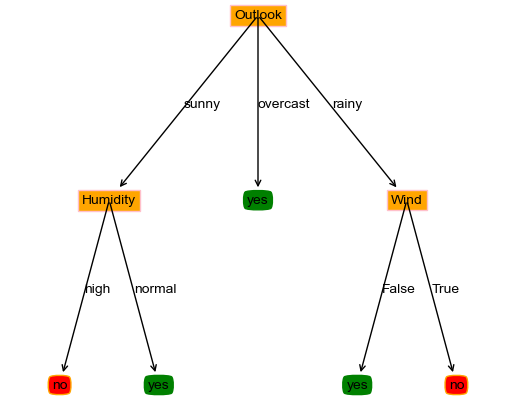

In [24]:
import numpy as np
import pandas as pd
#import treePlotter

class TreeNode(object):
    def __init__(self, ids=None, children=[], entropy=0, depth=0):
        self.ids = ids  
        self.entropy = entropy  
        self.depth = depth
        self.split_attribute = None 
        self.children = children  
        self.order = None 
        self.label = None  

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute
        self.order = order

    def set_label(self, label):
        self.label = label


def entropy(freq):
    # remove prob 0
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0 / float(freq_0.sum())
    return -np.sum(prob_0 * np.log(prob_0))


class TreeNode(object):
    def __init__(self, ids, entropy, depth):
        self.ids = ids
        self.entropy = entropy
        self.depth = depth
        self.split_attribute = None
        self.order = None
        self.label = None
        self.children = []

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute
        self.order = order

    def set_label(self, label):
        self.label = label

class DecisionTreeID3(object):
    def __init__(self, max_depth=10, min_samples_split=2, min_gain=1e-4):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.Ntrain = 0
        self.min_gain = min_gain

    def fit(self, X_train, y_train):
        self.Ntrain = X_train.shape[0]
        self.data = X_train
        self.attributes = X_train.columns.tolist()
        self.target = y_train
        self.labels = y_train.unique()

        ids = np.arange(self.Ntrain)
        self.root = TreeNode(ids=ids, entropy=self._entropy(ids), depth=0)
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)
                if not node.children:  # leaf node
                    self._set_label(node)
                queue += node.children
            else:
                self._set_label(node)

    def _entropy(self, ids):
        if len(ids) == 0:
            return 0
        freq = np.array(self.target.iloc[ids].value_counts())
        p = freq / freq.sum()
        return entropy(p)

    def _set_label(self, node):
        target_ids = node.ids
        node.set_label(self.target.iloc[target_ids].mode()[0])

    def _split(self, node):
        ids = node.ids
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids]
        for att in self.attributes:
            values = sub_data[att].unique().tolist()
            if len(values) == 1:
                continue
            splits = []
            for val in values:
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                splits.append(sub_ids)
            if min(map(len, splits)) < self.min_samples_split:
                continue
            HxS = 0
            for split in splits:
                HxS += len(split) * self._entropy(split) / len(ids)
            gain = node.entropy - HxS
            if gain < self.min_gain:
                continue
            if gain > best_gain:
                best_gain = gain
                best_splits = splits
                best_attribute = att
                order = values
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids=split, entropy=self._entropy(split), depth=node.depth + 1) for split in best_splits]
        return child_nodes
    
    def predict(self, new_data):
        npoints = new_data.count()[0]
        labels = [None] * npoints
        for n in range(npoints):
            x = new_data.iloc[n, :]  # one point
            node = self.root
            while node.children:
                node = node.children[node.order.index(x[node.split_attribute])]
            labels[n] = node.label

        return labels


def show_tree(tnode: TreeNode):
    global decs_tree
    flag = True
    if not tnode.children:
        return
    if tnode.split_attribute != None:
        decs_tree += "'{}':{{".format(tnode.split_attribute)
        print(tnode.split_attribute, ':{', sep='', end='')
        ans = tnode.order
        for i in range(len(ans)):
            temp = tnode.children[ans.index(ans[i])]
            decs_tree += "'{}':".format(ans[i])
            print(ans[i], ':', sep=' ', end='')
            if temp.label != None:
                decs_tree += "'" + temp.label + "'"
                print(temp.label,end='')
            else:
                flag = not flag
                decs_tree += '{'
                print('{',end='')
            show_tree(temp)
            if not flag:
                decs_tree += '}'
                print('}',end='')
                flag = True
            if i != len(ans) - 1:
                decs_tree += ','
                print(',',end='')
        decs_tree += '}'
        print('}',end='')
    # if tnode.label != None:
    
y_true_list = df.iloc[:, -1]
y_train_list = y_true_list.tolist()[:train_size]
y_test_list = y_true_list.tolist()[train_size:]


if __name__ == "__main__":
    global decs_tree
    decs_tree = ''
    tree = DecisionTreeID3(max_depth=3, min_samples_split=1)
    tree.fit(X_train, y_train) 
    print("\n\n")
    print("Predicted Values")
    print(tree.predict(X_test))
    print("Actual Values")
    print(y_test_list)    
    print("\n")
    print("The Decision Tree is\n")
    node = tree.root
    show_tree(node)
    print()   
    decs_tree = '{' + decs_tree + '}'
    print(eval(decs_tree)) 
    print("\nDecision Tree\n")
    ID3_Tree(eval(decs_tree))

# Q3 : | Confusion Matrix | Accuracy | Recall | Precision | F-score |

In [17]:
print("\n\n")
print("Predicted Values")
print(tree.predict(X_test))
print("Actual Values")
print(y_test_list)    
print("\n")

def evaluate_(y_true, y_pred):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    


    for i in range(len(y_true)):       
        if y_true[i] == 'yes' and y_pred[i] == 'yes':
            true_positives += 1
        elif y_true[i] == 'no' and y_pred[i] == 'no':
            true_negatives += 1
        elif y_true[i] == 'yes' and y_pred[i] == 'no':
            false_negatives += 1
        elif y_true[i] == 'no' and y_pred[i] == 'yes':
            false_positives += 1

    confusion_matrix = {
        'true_positives': true_positives,
        'true_negatives': true_negatives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    }

    accuracy = (true_positives + true_negatives) / len(y_true)

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f_score = 2 * (precision * recall) / (precision + recall)

    return confusion_matrix, accuracy, recall, precision, f_score


y_pred = tree.predict(X_test)
confusion_matrix, accuracy, recall, precision, f_score = evaluate_(y_test_list, y_pred)
print("Confusion Matrix:", confusion_matrix)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", f_score)




Predicted Values
['yes', 'yes', 'no']
Actual Values
['yes', 'yes', 'no']


Confusion Matrix: {'true_positives': 2, 'true_negatives': 1, 'false_positives': 0, 'false_negatives': 0}
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F-score: 1.0


# Q4 : 